# WhatsApp Chat Analysis 

In this notebook I will be doing a chat analysis and will try to answer some questions related to this chat. I will be using some common python libraries.

## How to get the data?
* Open WhatsApp
* Open the group of which you want to the analysis
* Click on the three dots on top right corner of your phone
* Click on more
* Click on export chat
* Choose whether you want media or not (in this notebook i will go without media)
* Then export the chat wherever you want

In [1]:
!pip install wordcloud

In [2]:
import os
import jovian
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by opening the data file, I have alredy uploaded the file with this so I can directly acess it.

The dataset has been downloaded and extracted.

In [4]:
os.listdir('.')

['.profile',
 '.bashrc',
 '.bash_logout',
 '.local',
 '.cache',
 '.jupyter',
 'zerotopandas-course-project.ipynb',
 '.jovian',
 '.ipython',
 '.ipynb_checkpoints',
 'Chat.txt',
 '.jovianrc',
 'converted.csv',
 '.empty',
 'work',
 '.config',
 '.conda',
 '.git',
 '.yarn']

Let us save and upload our work to Jovian before continuing.

In [5]:
!pip install jovian --upgrade -q

## Data Preparation and Cleaning

**TODO** - Exported data from the whatsapp is a txt file and is in format which has to be converted in a csv format which can then be easily converted into a pandas dataframe.



In [6]:
with open('Chat.txt', mode='r') as file:
  file_lines = file.readlines()

In [7]:
file_lines

['12/18/20, 16:26 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '12/18/20, 15:34 - +91 70450 67635 created group "CSE A2 batch 2020-24"\n',
 "12/18/20, 16:26 - You joined using this group's invite link\n",
 "12/18/20, 16:29 - +91 91603 77724 joined using this group's invite link\n",
 '12/18/20, 16:33 - +91 98207 76270: Please invite whoever you know from A2 batch\n',
 '12/18/20, 16:34 - +91 70450 67635: This message was deleted\n',
 '12/18/20, 16:34 - +91 94092 60046: Ok\n',
 '12/18/20, 16:35 - +91 70450 67635 added +91 99046 43634\n',
 "12/18/20, 16:37 - +91 89789 73243 joined using this group's invite link\n",
 "12/18/20, 16:40 - +91 91191 44167 joined using this group's invite link\n",
 '12/18/20, 16:41 - +91 95129 35749: Is there any quiz?\n',
 '12/18/20, 16:42 - +91 95129 35749: <Media omitted>\n',
 "12/18/20, 16:43 - +91 70176 00211 joined using this group's invite link\n",
 "12/1

In [8]:
header = ['date', 'time', 'user', 'message']

Lets first define a function which can convert the data in a csv format

In [9]:
def parse_line (data_line):
    try:
        y = data_line.strip().split(',')
        z = y[1].split('-')
        k = z[1].split(':')
        list = [y[0], z[0], k[0], k[1]]
        return list
    except:
        pass

Let's whether above function works properly or not.

In [10]:
parse_line(file_lines[5])

['12/18/20', ' 16:34 ', ' +91 70450 67635', ' This message was deleted']

Now let's write the data into a new file called converted.csv

In [11]:
with open('converted.csv', mode='w') as con:
    con.write(','.join(header) + '\n')
    
    for item in file_lines:
        line = parse_line(item)
        if line!=None:
            con.write(line[0].strip() + ',' + line[1].strip() + ',' + line[2].strip() + ',' + line[3].strip() + '\n')

In [12]:
os.listdir()

['.profile',
 '.bashrc',
 '.bash_logout',
 '.local',
 '.cache',
 '.jupyter',
 'zerotopandas-course-project.ipynb',
 '.jovian',
 '.ipython',
 '.ipynb_checkpoints',
 'Chat.txt',
 '.jovianrc',
 'converted.csv',
 '.empty',
 'work',
 '.config',
 '.conda',
 '.git',
 '.yarn']

Converted.csv appeared in the folder

In [13]:
chat_df = pd.read_csv('converted.csv')

In [14]:
chat_df

,date,time,user,message
0,12/18/20,16:33,+91 98207 76270,Please invite whoever you know from A2 batch
1,12/18/20,16:34,+91 70450 67635,This message was deleted
2,12/18/20,16:34,+91 94092 60046,Ok
3,12/18/20,16:41,+91 95129 35749,Is there any quiz?
4,12/18/20,16:42,+91 95129 35749,<Media omitted>
...,...,...,...,...
25566,6/9/21,00:08,+91 91191 44167,Combine hi aata h uss m
25567,6/9/21,00:08,Jaseja Priyansh,<Media omitted>
25568,6/9/21,00:14,+91 77940 17878,Arre bro !!! 😂😂
25569,6/9/21,00:15,+91 99595 37918,<Media omitted>


We have to drop those lines which have Media

In [15]:
media_messages_df = chat_df[chat_df.message=="<Media omitted>"]
to_be_dropped = chat_df[chat_df.message=="<Media omitted>"]
to_be_dropped

,date,time,user,message
4,12/18/20,16:42,+91 95129 35749,<Media omitted>
100,12/22/20,19:50,+91 82388 85193,<Media omitted>
115,12/22/20,20:55,+91 82388 85193,<Media omitted>
176,12/23/20,15:19,+91 75009 29425,<Media omitted>
187,12/23/20,15:29,+91 84216 90101,<Media omitted>
...,...,...,...,...
25473,6/8/21,13:06,+91 91191 44167,<Media omitted>
25557,6/8/21,16:04,+91 84216 90101,<Media omitted>
25567,6/9/21,00:08,Jaseja Priyansh,<Media omitted>
25569,6/9/21,00:15,+91 99595 37918,<Media omitted>


In [16]:
chat_df.drop(to_be_dropped.index, inplace=True)

In [17]:
chat_df.user.unique()

array(['+91 98207 76270', '+91 70450 67635', '+91 94092 60046',
       '+91 95129 35749', '+91 91191 44167', '+91 82388 85193',
       '+91 98174 15676', '+91 99811 89852', '+91 75009 29425',
       'Jaseja Priyansh', '+91 72597 08715', '+91 99204 50432',
       '+91 84216 90101', '+91 91794 37901', '+91 99046 43634',
       '+91 89789 73243', '+91 70176 00211', '+91 73787 76427',
       '+91 85869 85911', '+91 87009 83822', '+91 70462 44503',
       '+91 83746 93487', '+91 91097 39116', '+91 77940 17878',
       '+91 72066 37556', '+91 95116 38158', '+91 99595 37918',
       '+91 88560 38177', '+91 80900 73858', '+91 80745 79397',
       '+91 70288 13464', '+91 99990 60533', '+91 95529 46121',
       '+91 79933 94979', '+91 83284 60779', '+91 99667 37566',
       '+91 90144 84784', '+91 96386 71317', '+91 91774 97596',
       '+91 79958 58869'], dtype=object)

In [18]:
chat_df.user.replace(to_replace='+91 91191 44167', value='Sanskar', inplace=True)
chat_df.user.replace(to_replace='+91 98207 76270', value='Nishit', inplace=True)
chat_df.user.replace(to_replace='+91 70450 67635', value='Shruti', inplace=True)
chat_df.user.replace(to_replace='+91 94092 60046', value='Nishchay', inplace=True)
chat_df.user.replace(to_replace='+91 95129 35749', value='Nilay Patel', inplace=True)
chat_df.user.replace(to_replace='+91 82388 85193', value='Nilay Ganvit', inplace=True)
chat_df.user.replace(to_replace='+91 98174 15676', value='Neha', inplace=True)
chat_df.user.replace(to_replace='+91 99811 89852', value='Vansh', inplace=True)
chat_df.user.replace(to_replace='+91 75009 29425', value='Umang', inplace=True)
chat_df.user.replace(to_replace='+91 72597 08715', value='Nischit', inplace=True)
chat_df.user.replace(to_replace='+91 99204 50432', value='Omkar', inplace=True)
chat_df.user.replace(to_replace='+91 84216 90101', value='Vihaan', inplace=True)
chat_df.user.replace(to_replace='+91 91794 37901', value='Rishi', inplace=True)
chat_df.user.replace(to_replace='+91 99046 43634', value='Mitika', inplace=True)
chat_df.user.replace(to_replace='+91 89789 73243', value='Mir', inplace=True)
chat_df.user.replace(to_replace='+91 70176 00211', value='Subha', inplace=True)
chat_df.user.replace(to_replace='+91 73787 76427', value='Rahul', inplace=True)
chat_df.user.replace(to_replace='+91 85869 85911', value='Mukul', inplace=True)
chat_df.user.replace(to_replace='+91 87009 83822', value='Prashant', inplace=True)
chat_df.user.replace(to_replace='+91 70462 44503', value='Saral', inplace=True)
chat_df.user.replace(to_replace='+91 91097 39116', value='Vipul', inplace=True)
chat_df.user.replace(to_replace='+91 77940 17878', value='Satwik', inplace=True)
chat_df.user.replace(to_replace='+91 72066 37556', value='Mayank', inplace=True)
chat_df.user.replace(to_replace='+91 95116 38158', value='Prathmesh', inplace=True)
chat_df.user.replace(to_replace='+91 99595 37918', value='Wanhar', inplace=True)
chat_df.user.replace(to_replace='+91 88560 38177', value='Shubham', inplace=True)
chat_df.user.replace(to_replace='+91 80900 73858', value='Saurabh', inplace=True)
chat_df.user.replace(to_replace='+91 80745 79397', value='Lohith', inplace=True)
chat_df.user.replace(to_replace='+91 70288 13464', value='Sakshi', inplace=True)
chat_df.user.replace(to_replace='+91 99990 60533', value='Rishabh', inplace=True)
chat_df.user.replace(to_replace='+91 95529 46121', value='Mihir', inplace=True)
chat_df.user.replace(to_replace='+91 79933 94979', value='Bhanu Nayak', inplace=True)
chat_df.user.replace(to_replace='+91 83284 60779', value='Srinikhita', inplace=True)
chat_df.user.replace(to_replace='+91 99667 37566', value='Krishna', inplace=True)
chat_df.user.replace(to_replace='+91 90144 84784', value='Akshay', inplace=True)
chat_df.user.replace(to_replace='+91 91774 97596', value='Dinesh Kumar', inplace=True)
chat_df.user.replace(to_replace='+91 79958 58869', value='Ramakrishna', inplace=True)


In [19]:
chat_df.sample(5)

,date,time,user,message
18301,4/16/21,11:19,Rishi,Slides ko dikhar hi maine bol diya🤣🤣
11090,2/26/21,14:12,Rishi,🎉🎉👏👏
21043,5/15/21,14:50,Vihaan,Which website?
25440,6/8/21,10:21,Nishchay,Nice bro
10761,2/23/21,19:00,Neha,This message was deleted


In [20]:
chat_df.user.unique()

array(['Nishit', 'Shruti', 'Nishchay', 'Nilay Patel', 'Sanskar',
       'Nilay Ganvit', 'Neha', 'Vansh', 'Umang', 'Jaseja Priyansh',
       'Nischit', 'Omkar', 'Vihaan', 'Rishi', 'Mitika', 'Mir', 'Subha',
       'Rahul', 'Mukul', 'Prashant', 'Saral', '+91 83746 93487', 'Vipul',
       'Satwik', 'Mayank', 'Prathmesh', 'Wanhar', 'Shubham', 'Saurabh',
       'Lohith', 'Sakshi', 'Rishabh', 'Mihir', 'Bhanu Nayak',
       'Srinikhita', 'Krishna', 'Akshay', '+91 96386 71317',
       'Dinesh Kumar', 'Ramakrishna'], dtype=object)

So, I was able to find these only numbers in my group and have changed to there names. Number +91 96386 71317 appered to be of spammer which are not in the group but have messaged once. 
Therefore removing there entries from the dataset

In [21]:
to_be_dropped1 = chat_df[chat_df.user=='+91 96386 71317']
to_be_dropped2 = chat_df[chat_df.user=='+91 83746 93487']
chat_df.drop(to_be_dropped1.index, inplace=True)
chat_df.drop(to_be_dropped2.index, inplace=True)

In [22]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22444 entries, 0 to 25568
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     22444 non-null  object
 1   time     22444 non-null  object
 2   user     22444 non-null  object
 3   message  22432 non-null  object
dtypes: object(4)
memory usage: 876.7+ KB


In [23]:
chat_df['date'] = chat_df.date + " " + chat_df.time
chat_df['date'] = pd.to_datetime(chat_df.date)

In [24]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22444 entries, 0 to 25568
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     22444 non-null  datetime64[ns]
 1   time     22444 non-null  object        
 2   user     22444 non-null  object        
 3   message  22432 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 876.7+ KB


In [25]:
chat_df.drop(columns='time', inplace=True)

In [26]:
chat_df.sample(10)

,date,user,message
6491,2021-02-03 14:45:00,Vihaan,Which is not
2145,2021-01-07 19:40:00,Mir,agar problem aayi to mail kardenge probably
13902,2021-03-13 12:34:00,Mukul,Hence we used the O outputs to know which syst...
13837,2021-03-12 17:18:00,Neha,Nope
2004,2021-01-05 19:55:00,Neha,++
24194,2021-05-31 09:36:00,Mukul,Aaj kuchh toofaani karte hai 😂😂😂
7225,2021-02-04 16:20:00,Mayank,Yeah
833,2020-12-29 14:23:00,Mayank,Kisi par koi sa question hua
25495,2021-06-08 13:57:00,Rishi,Beautiful story and amazing panels 👍👍
5809,2021-01-29 17:47:00,Nishit,korrect


Let's add following columns in dataframe
1. Gender
2. Month
3. Weekday
4. Minute

In [27]:
chat_df['gender'] = 'M'
chat_df
chat_df.loc[chat_df.user=='Neha', 'gender'] = 'F'
chat_df.loc[chat_df.user=='Subha', 'gender'] = 'F'
chat_df.loc[chat_df.user=='Shruti', 'gender'] = 'F'
chat_df.loc[chat_df.user=='Mitika', 'gender'] = 'F'
chat_df.loc[chat_df.user=='Sakshi', 'gender'] = 'F'
chat_df.loc[chat_df.user=='Srinikhita', 'gender'] = 'F'

In [28]:
chat_df['month'] = pd.DatetimeIndex(chat_df.date).month
chat_df['weekday'] = pd.DatetimeIndex(chat_df.date).weekday
chat_df['hour'] = pd.DatetimeIndex(chat_df.date).hour
chat_df['minute'] = pd.DatetimeIndex(chat_df.date).minute

The data has been cleaned, now we are set to do some exploratory analysis and visualization.

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



In [29]:
chat_df.describe()

,month,weekday,hour,minute
count,22444.000000,22444.000000,22444.000000,22444.000000
mean,3.558100,2.588309,14.642978,27.965915
std,2.572872,1.691983,4.286077,18.308509
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,12.000000,11.000000
50%,3.000000,3.000000,14.000000,27.000000
75%,5.000000,4.000000,18.000000,45.000000
max,12.000000,6.000000,23.000000,59.000000


> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [31]:
chat_df.message.value_counts()[:20]

++                          641
This message was deleted    563
😂😂                          335
😂                           302
Yes                         291
No                          153
Ok                          132
👍                           130
https                       128
Haan                        121
Yeah                        118
.                            91
😂😂😂                          84
+                            80
Hmm                          64
Okay                         58
?                            57
Ha                           54
Thanks                       52
Han                          51
Name: message, dtype: int64

From above we can infere that "++" was the most common message in the dataset.

Let's first find out in which month the group has most messages.

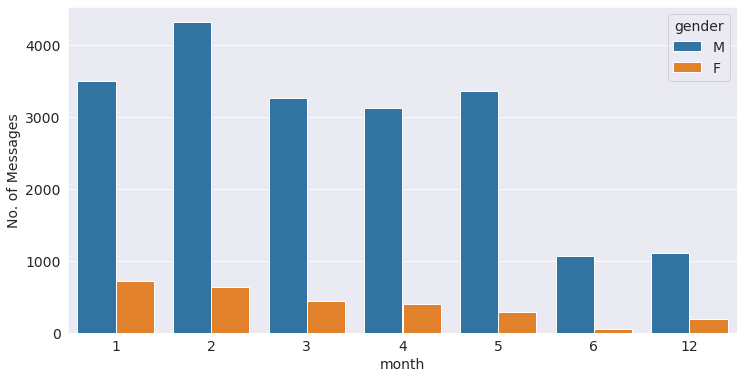

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='gender', data=chat_df)
plt.ylabel('No. of Messages');

It seems that Feburary was the month when the group was most active. Maybe it is because we had our endsems in that month. 

In [33]:
feb_month_df = chat_df[chat_df.month==2]
feb_month_df

,date,user,message,gender,month,weekday,hour,minute
5891,2021-02-01 12:51:00,Nilay Patel,Aaj kuch nahi hai nah?,M,2,0,12,51
5893,2021-02-01 12:52:00,Nilay Ganvit,Ig no Tutorial,M,2,0,12,52
5895,2021-02-01 12:54:00,Subha,Abe 😂😂 kya bigada usne tera😂,F,2,0,12,54
5896,2021-02-01 12:55:00,Umang,Tere ko tutorial chahiye thaa kya?,M,2,0,12,55
5898,2021-02-01 12:56:00,Sanskar,Kuchni....yuhi kuch sticker ni mila to daaldiya🤷,M,2,0,12,56
...,...,...,...,...,...,...,...,...
11201,2021-02-27 11:55:00,Nishit,This message was deleted,M,2,5,11,55
11202,2021-02-27 11:57:00,Jaseja Priyansh,Thanks to all 🙏,M,2,5,11,57
11203,2021-02-27 11:57:00,Nishit,This message was deleted,M,2,5,11,57
11204,2021-02-27 11:59:00,Nishit,This message was deleted,M,2,5,11,59


In [34]:
feb_month_df.date.dt.date.unique()

array([datetime.date(2021, 2, 1), datetime.date(2021, 2, 2),
       datetime.date(2021, 2, 3), datetime.date(2021, 2, 4),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 6),
       datetime.date(2021, 2, 7), datetime.date(2021, 2, 8),
       datetime.date(2021, 2, 9), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 11), datetime.date(2021, 2, 12),
       datetime.date(2021, 2, 13), datetime.date(2021, 2, 14),
       datetime.date(2021, 2, 15), datetime.date(2021, 2, 16),
       datetime.date(2021, 2, 17), datetime.date(2021, 2, 18),
       datetime.date(2021, 2, 19), datetime.date(2021, 2, 20),
       datetime.date(2021, 2, 21), datetime.date(2021, 2, 22),
       datetime.date(2021, 2, 23), datetime.date(2021, 2, 24),
       datetime.date(2021, 2, 25), datetime.date(2021, 2, 26),
       datetime.date(2021, 2, 27)], dtype=object)

Plotting a graph specific for February month, which will show datewise messages in the group.

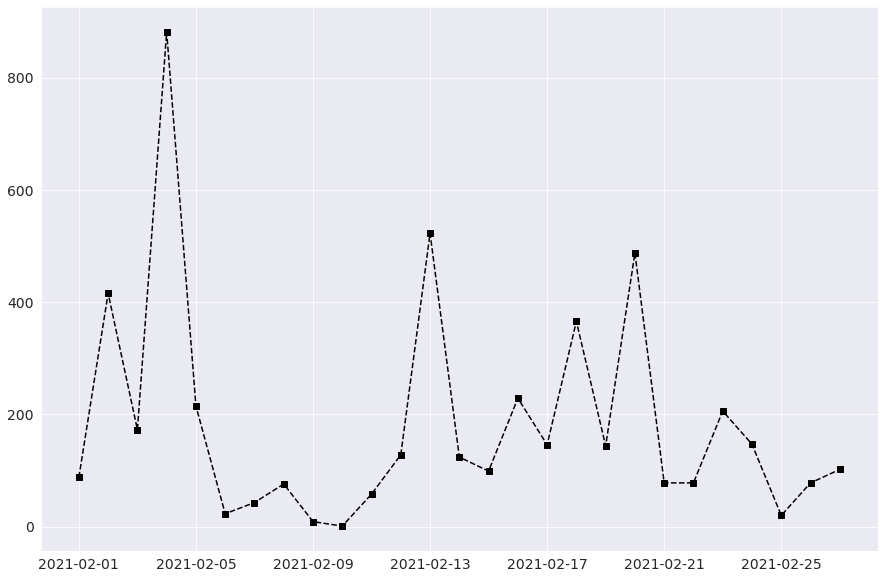

In [35]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=0)
plt.plot(feb_month_df.date.dt.date.unique(), feb_month_df.groupby(feb_month_df.date.dt.date).month.value_counts(), marker='s', color='black', ls='--');

## Asking and Answering Questions

Now we will be answering some questions related to the dataset by plotting graphs and doing some operations on columns of dataframe.

### Ques 1 - Who is the most active and least active member of the group?
Let's findout this by plotting the graph.





In [36]:
msgs_by_the_user = chat_df.user.value_counts()
msgs_by_the_user.sample(5)

Srinikhita            8
Bhanu Nayak          28
Subha               735
Mir                 503
Jaseja Priyansh    1004
Name: user, dtype: int64

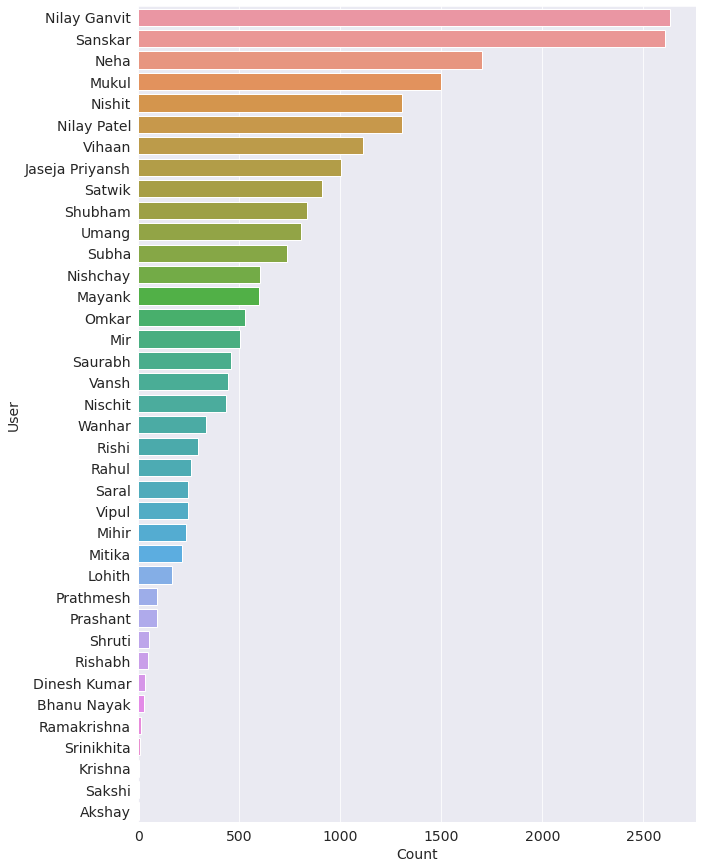

In [37]:
plt.figure(figsize=(10, 15))
sns.barplot(y=msgs_by_the_user.index, x=msgs_by_the_user[msgs_by_the_user.index])
plt.xlabel('Count')
plt.ylabel('User');

**Note** That in above graph those messages aren't included which contains media, only the text messages are considered.

Let's take the discussion towards a more specific messages i.e. Deleted Messages. We will be plotting the same graph to know who deletes the meassages most?

In [38]:
deleted_msgs_df = chat_df[(chat_df.message=='This message was deleted')|(chat_df.message=='You deleted this message')]
list_del = deleted_msgs_df.user.value_counts()

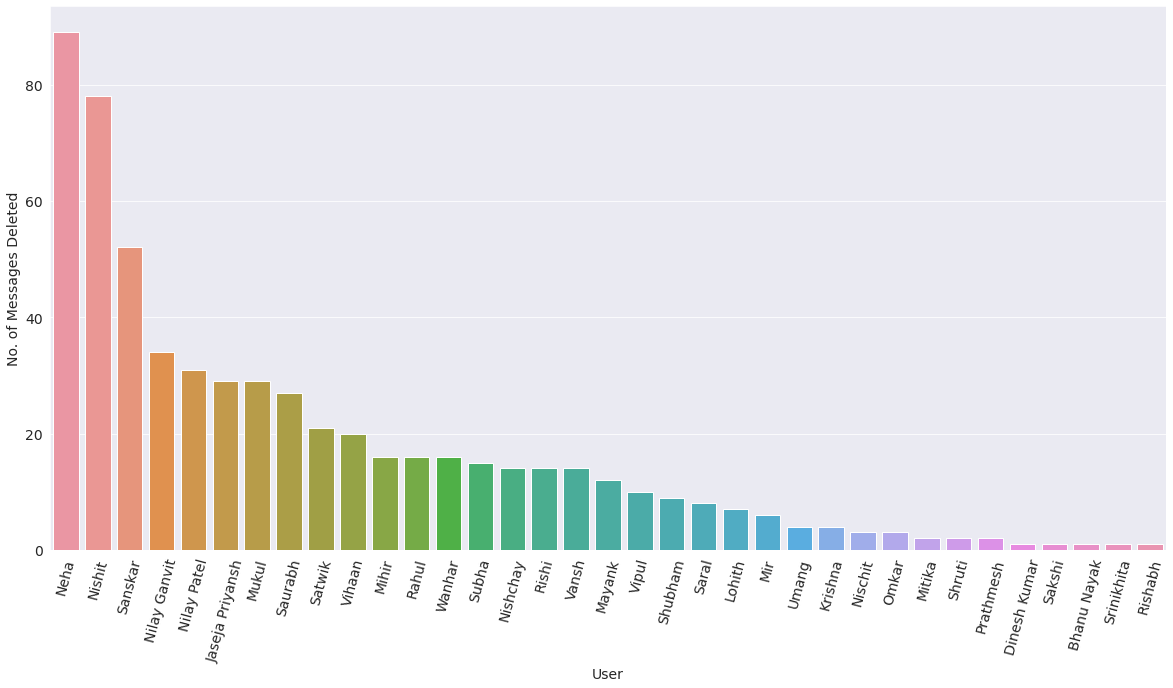

In [39]:
plt.figure(figsize=(20, 10))
sns.barplot(y=list_del[list_del.index], x=list_del.index)
plt.xticks(rotation=75)
plt.xlabel('User')
plt.ylabel('No. of Messages Deleted');

### Ques 2 - Which day the group remains most active?

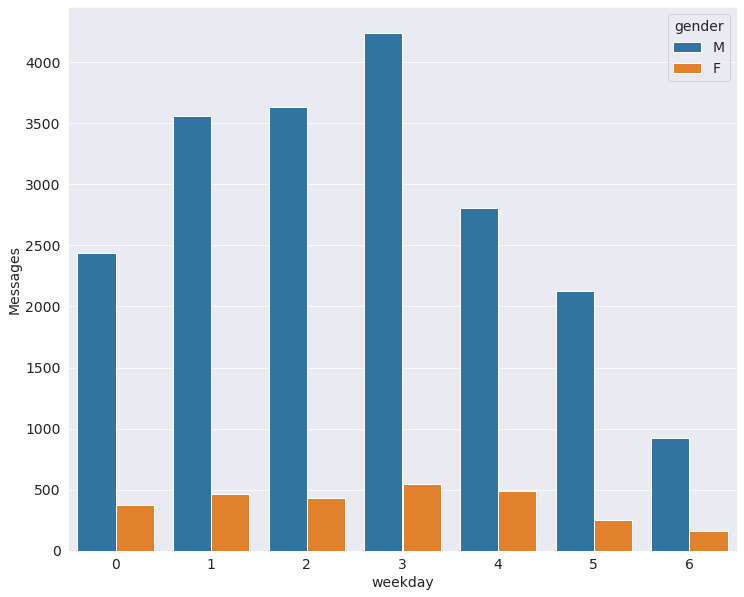

In [40]:
plt.figure(figsize=(12, 10))
sns.countplot(x=chat_df.weekday, hue=chat_df.gender)
plt.ylabel('Messages');

**NOTE** - Here 0 represents Monday, 1 Tuesday and so on..... 

On observing the graph, the group is least active on sunday and saturday. The result is also quiet expected because we have holidays of college on the weekends so everyone is busy with there work and no discussion on classes. 

### Ques 3 - Distribution of users with weekdays on basis of there meassages.

In [41]:
series = chat_df.groupby('weekday').user.value_counts()
x_df = series.to_frame(name='msgs')
x_df = x_df.reset_index(level=0)
x_df['user'] = x_df.index
x_df.reset_index(drop=True, inplace=True)

In [42]:
ydf = x_df.pivot('weekday', 'user', 'msgs')
ydf.replace(to_replace=np.nan, value=0)

user,Akshay,Bhanu Nayak,Dinesh Kumar,Jaseja Priyansh,Krishna,Lohith,Mayank,Mihir,Mir,Mitika,...,Saurabh,Shruti,Shubham,Srinikhita,Subha,Umang,Vansh,Vihaan,Vipul,Wanhar
weekday,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,110.0,0.0,31.0,44.0,9.0,66.0,39.0,...,75.0,4.0,79.0,0.0,74.0,88.0,38.0,127.0,26.0,78.0
1,1.0,6.0,3.0,209.0,1.0,43.0,172.0,39.0,75.0,50.0,...,62.0,12.0,165.0,1.0,123.0,160.0,52.0,261.0,32.0,57.0
2,0.0,7.0,1.0,161.0,3.0,20.0,52.0,35.0,95.0,45.0,...,81.0,7.0,145.0,0.0,98.0,111.0,86.0,194.0,23.0,35.0
3,0.0,6.0,16.0,201.0,2.0,30.0,117.0,40.0,129.0,44.0,...,92.0,22.0,151.0,6.0,203.0,195.0,149.0,194.0,42.0,71.0
4,2.0,6.0,6.0,149.0,1.0,40.0,70.0,35.0,41.0,31.0,...,69.0,7.0,159.0,1.0,143.0,88.0,72.0,182.0,24.0,47.0
5,0.0,0.0,3.0,102.0,0.0,4.0,114.0,34.0,72.0,3.0,...,45.0,0.0,101.0,0.0,69.0,130.0,37.0,103.0,73.0,24.0
6,0.0,1.0,5.0,72.0,0.0,2.0,28.0,44.0,25.0,7.0,...,36.0,0.0,35.0,0.0,25.0,34.0,11.0,54.0,27.0,26.0


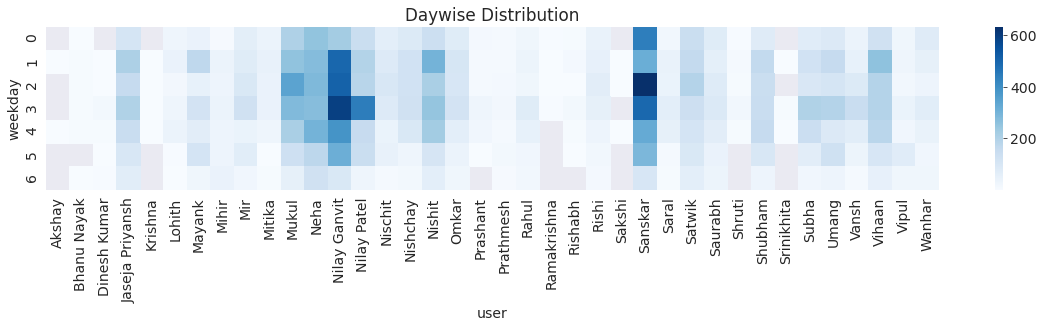

In [43]:
plt.figure(figsize=(20,3))
sns.heatmap(ydf, cmap='Blues')
plt.title('Daywise Distribution');

### Ques 4 - Which emojis were most used?

In [44]:
all_char_msgs = []
for line in chat_df.message:
  arr = str(line).split(' ')
  for word in arr:
    for char in word:
      all_char_msgs.append(char)

In [45]:
count = pd.Series(all_char_msgs).value_counts()
count

a    46422
e    40947
i    30569
t    27254
h    25514
     ...  
⠆        1
🦸        1
ˇ        1
😹        1
👊        1
Length: 386, dtype: int64

In [46]:
new_list = {}
for char in count.index:
  z = int(ord(char))
  if (z>=97 and z<=122) or (z>=65 and z<=90):
    pass
  elif z>=120000:
    new_list[char]=count[char]
sorted(new_list.items(), key=lambda item: item[1], reverse=True)[:9]

[('😂', 3488),
 ('🤣', 508),
 ('👍', 500),
 ('🔥', 380),
 ('😅', 324),
 ('😭', 237),
 ('🏻', 220),
 ('😑', 171),
 ('🤦', 129)]

This '😂' was most used about 3000+ times. Wow! 

Next most commonly used was this '🤣'. Both are of laughing face

### Ques 5 - What are the words which are most frequently used while chatting?

In [47]:
list_of_words = []
for line in chat_df.message:
  arr = str(line).split(' ')
  for word in arr:
    list_of_words.append(word)

In [48]:
list_of_words = pd.Series(list_of_words)
list_of_words.value_counts()

to               1531
the              1393
hai              1305
is               1054
I                 912
                 ... 
se....capital       1
karke😕              1
309                 1
points"             1
rah😂😂               1
Length: 16390, dtype: int64

In [49]:
chat_df.message.value_counts()

++                                                641
This message was deleted                          563
😂😂                                                335
😂                                                 302
Yes                                               291
                                                 ... 
😯                                                   1
bas bhai                                            1
Grid banani hai?                                    1
outline keliye...sir ne class me bataya tha na      1
Aaj dusri h 10 baje                                 1
Name: message, Length: 16538, dtype: int64

LOL '++' was the most common alone message to be done... XD and "to" was the most common word used in the mesaages.

Let's make a word-cloud image of these words

In [50]:
def make_string(x):
  a=' '
  for word in x:
    a = a + str(word) + ' '
  return a

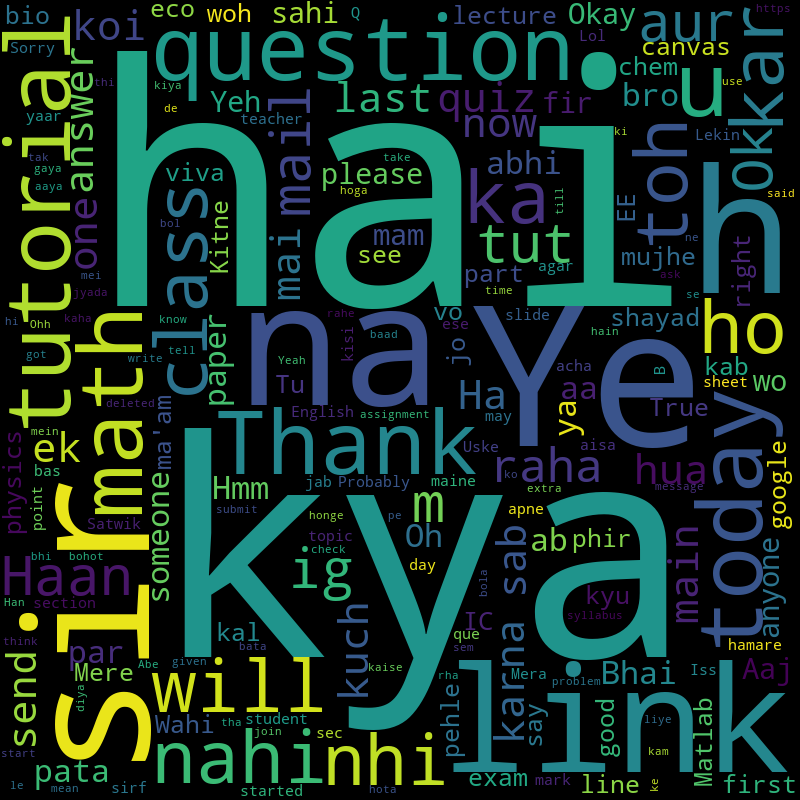

In [51]:
img = WordCloud(width=800, 
                height=800, 
                background_color='black', 
                min_font_size=10).generate(make_string(list_of_words.value_counts().index[0:1000]))
img.to_image()

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

So while answering these questions we can makeout several conclusions -
* In the group there are some peeps whom have done 2500 plus messages whereas on other hand we also have some whom have not even done five messages.
* Group remains most active on weekdays more specifically on Thursday and is least active on weekends.
* Tone of writing mostly was neutral, friendly and informal. 




## References and Future Work
So this was my Whatsapp Chat analysis. You can do a similar analysis with other apps data such as facebook, instagram and many more apps which provides the data to the user.

#### Refrences
*   https://pandas.pydata.org/
*   https://matplotlib.org/
*   https://seaborn.pydata.org/





In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pjaseja11/zerotopandas-course-project" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/pjaseja11/zerotopandas-course-project


'https://jovian.ai/pjaseja11/zerotopandas-course-project'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
